In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
net = cv2.dnn.readNet('../storage/models/yolo_model_1/yolov4-tiny-logistics_size_416_1.weights', 
                      '../storage/models/yolo_model_1/yolov4-tiny-logistics_size_416_1.cfg')

layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

with open("../storage/models/yolo_model_1/logistics.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

print(classes)

['barcode', 'car', 'cardboard box', 'fire', 'forklift', 'freight container', 'gloves', 'helmet', 'ladder', 'license plate', 'person', 'qr code', 'road sign', 'safety vest', 'smoke', 'traffic cone', 'traffic light', 'truck', 'van', 'wood pallet']


In [3]:
#sample image
image_path = "../storage/data/dataset/-0B43DB53-2377-4D6D-B5B8-60CBBAB90F88-png_jpg.rf.c86dd7b63fec7f38702d138dfcbad987.jpg"
image = cv2.imread(image_path)

blob = cv2.dnn.blobFromImage(image,
                              scalefactor = 1/255.,
                              size = (416, 416),
                              mean = (0, 0, 0),
                              swapRB = True,
                              crop = False
)

net.setInput(blob)
outputs = net.forward(output_layers)

In [5]:
blob.shape

(1, 3, 416, 416)

In [15]:
for feature_map in outputs:
    for detection in feature_map:
        boxes = detection[:4]
        score = detection[4]
        class_score = detection[5:]

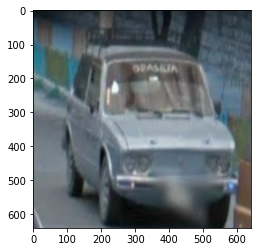

In [16]:
import matplotlib.pyplot as plt

plt.imshow(image)

In [13]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
# Add the parent directory (one level up) to the Python path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.insert(0, parent_dir)


#testing the function
from modules.inference import preprocessing

In [14]:
video_path = "../storage/data/test_videos/Safety_Full_Hat_and_Vest.mp4"

data = []

for frames in preprocessing.capture_video(video_path):
    data.append(frames)